# Pela Via Literal

##### Dada a hipotética função ondulatória:  

## $$ \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) $$

##### Solucionar a equação por meio da integração, tendo em vista, aoproximar a  sintaxe de programação à linguaqgem de maquina.

In [2]:

#Bibliotecas
%matplotlib inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from scipy.integrate import quad
import sympy as sy



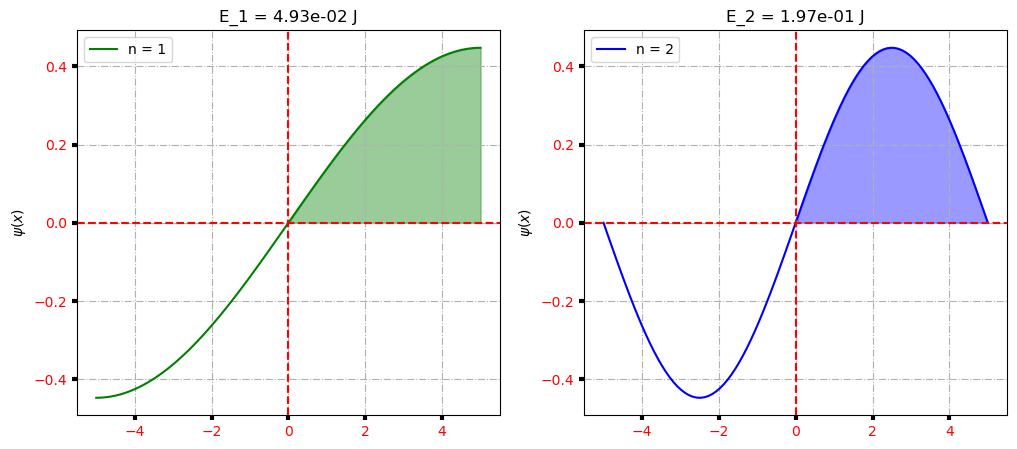

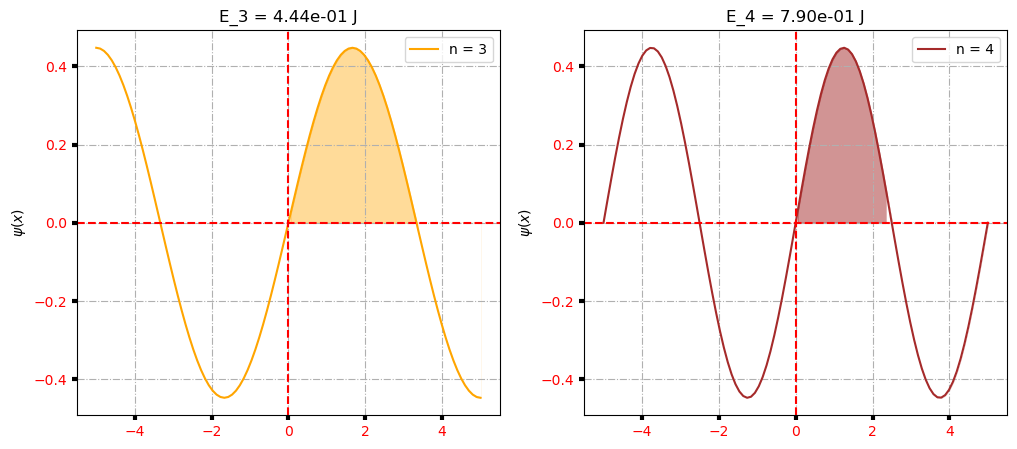

In [3]:
#Cálculo, análise e gráficos dos 4 primeiros níveis de energia

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
a=10
m=1
hbar=1
x = np.linspace(-a/2, a/2, 100)
x2 = np.linspace(0, a/2, 100)

def calcular_energia(n, hbar, m, a):
  """Calcula a energia de uma partícula numa caixa unidimensional."""
  return (n**2 * np.pi**2 * hbar**2) / (2 * m * a**2)


y1=np.sqrt(2/a)*(np.sin((1*np.pi*x)/a))
ax1.plot(x,y1, color='green', alpha=1.0, label='n = 1')
ax1.axhline(y=0, color="red", linestyle="--")
ax1.axvline(x=0, color="red", linestyle="--")

ax1.fill_between(x,y1, where = (x > 0), color='green', alpha=0.4)
E1= calcular_energia(1, hbar, m, a)
ax1.set_title(f"E_{1} = {E1:.2e} J")
ax1.set_ylabel('$\psi(x)$')
ax1.legend()

y2=np.sqrt(2/a)*(np.sin((2*np.pi*x)/a))
ax2.plot(x,y2, color='blue', alpha=1.0, label = 'n = 2')
ax2.axhline(y=0, color="red", linestyle="--")
ax2.axvline(x=0, color="red", linestyle="--")
ax2.fill_between(x,y2, where = (x > 0), color='blue', alpha=0.4)
E2= calcular_energia(2, hbar, m, a)

ax2.set_title(f"E_{2} = {E2:.2e} J")
ax2.set_ylabel('$\psi(x)$')
ax2.legend()

ax1.grid(True, linestyle='-.')
ax1.tick_params(labelcolor='r', labelsize='medium', width=3)

ax2.grid(True, linestyle='-.')
ax2.tick_params(labelcolor='r', labelsize='medium', width=3)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

y3=np.sqrt(2/a)*(np.sin((3*np.pi*x)/a))
ax1.plot(x,y3, color='orange', alpha=1.0, label = 'n = 3')
ax1.axhline(y=0, color="red", linestyle="--")
ax1.axvline(x=0, color="red", linestyle="--")
ax1.fill_between(x,y3, where = (x > 0), color='orange', alpha=0.4)
ax1.fill_between(x,y3, where = (x > 3.3), color='white', alpha=1.0)
E3= calcular_energia(3, hbar, m, a)
ax1.set_title(f"E_{3} = {E3:.2e} J")
ax1.set_ylabel('$\psi(x)$')

y4=np.sqrt(2/a)*(np.sin((4*np.pi*x)/a))
ax2.plot(x,y4, color='brown', alpha=1.0, label = 'n = 4')
ax2.axhline(y=0, color="red", linestyle="--")
ax2.axvline(x=0, color="red", linestyle="--")
ax2.fill_between(x,y4, where = (x > 0), color='brown', alpha=0.5)
ax2.fill_between(x,y4, where = (x > 2.3), color='white', alpha=1.0)
E4= calcular_energia(4, hbar, m, a)

ax2.set_title(f"E_{4} = {E4:.2e} J")
ax2.set_ylabel('$\psi(x)$')

ax1.grid(True, linestyle='-.')
ax1.tick_params(labelcolor='r', labelsize='medium', width=3)

ax2.grid(True, linestyle='-.')
ax2.tick_params(labelcolor='r', labelsize='medium', width=3)
ax1.legend()
ax2.legend()
plt.show()



### Soluções, via Cálculo Integral para:  

## $$ \int_0^L \psi_n^2(x) \ dx $$

## $$ \psi_n^2(x) = \frac{2}{L} \sin^2\left(\frac{n\pi x}{L}\right) $$

### Dois cenários:

In [4]:
#MÉTODO QUAD

import numpy as np
from scipy.integrate import quad
import math
L=10
# 1. função a ser integrada
def f(x):
    return (2/L) * math.sin(i*math.pi*x/L)**2

# 2. os limites de integração
a = 0  # Limite inferior
b = 10  # Limite superior

# 3. Calculo da integral usando quad
for i in range(1,5):
    valor_integral, erro = quad(f, a, b)

# 4.esultado
    print(f"A função integrada de {a} a {b} de n = {str(i)} é: {valor_integral} ")
    print(f"O erro estimado foi de: {erro}")

A função integrada de 0 a 10 de n = 1 é: 1.0 
O erro estimado foi de: 1.1102230246251565e-14
A função integrada de 0 a 10 de n = 2 é: 1.0 
O erro estimado foi de: 7.339840831400506e-10
A função integrada de 0 a 10 de n = 3 é: 1.0 
O erro estimado foi de: 1.1102230246251565e-14
A função integrada de 0 a 10 de n = 4 é: 1.0 
O erro estimado foi de: 7.33984109602126e-10


In [14]:
#VIA LITERAL
import math
dx=0.1
x=np.linspace(-5,5,100)
sum=0
passo=0
area=0
L=10
for j in range(1,5):
    for i in range(0,100):
        passo=x[i]
        y=(2/L) * 1*math.sin(j*math.pi*passo/L)**2
        area=y*dx
        sum+=area
    print('PDF para n=',j, sum-(j-1))

PDF para n= 1 1.01
PDF para n= 2 1.0000000000000009
PDF para n= 3 1.009999999999999
PDF para n= 4 0.9999999999999987


In [5]:
import numpy as np
import sklearn
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils.random import check_random_state
import graphviz

# 1. Generate synthetic data (e.g., y = 2*X_0 + 3*X_1^2)
a=10
x=np.linspace(-a/2,a/2/100)
y=np.sqrt(2/a)*np.sin((1*np.pi*x)/a)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Initialize and train the SymbolicRegressor
# You can customize functions, population size, generations, etc.

function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']


est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,
                           tournament_size=20,
                           stopping_criteria=0.01, # Stop if R^2 reaches this value
                           function_set=function_set,
                           parsimony_coefficient=0.01, # Penalty for complex equations
                           random_state=0,
                           verbose=1)




## Método Regressivo Simbólico da Biblioteca GPlearn.

In [6]:
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}

## Método de calibração, via treinamento

In [7]:
est_gp.fit(X_train.reshape(-1,1), y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0    15.94          16.3829        5        0.0319813              N/A      1.48m
   1     8.22          2.47508        8        0.0264177              N/A      1.23m
   2     5.15         0.945534        8        0.0264177              N/A      1.15m
   3     3.77         0.569384        6        0.0259456              N/A      1.33m
   4     3.39         0.444887        6        0.0259456              N/A      1.02m
   5     3.01         0.418202        3        0.0344377              N/A     54.57s
   6     3.02         0.430796        3        0.0344377              N/A     38.30s
   7     3.02         0.392775        3        0.0344377              N/A     34.13s
   8     3.02         0.448504        3        0.0344377              N/A     28.60s
   9     3.03         0.465451        3        0.0344377              N/A     50.24s
  10     3.02         0.427395        3        0.0344377              N/A     27.15s
  11     3.05         0.429188        3        0.0344377         

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [8]:
# 4. Evaluate the model
y_pred = est_gp.predict(X_test.reshape(-1,1))
print(f"R^2 score on test data: {r2_score(y_test, y_pred):.4f}")

# 5. Print the discovered equation
print(f"Discovered equation: {est_gp._program}")

next_e_funcao=sympify(str(est_gp._program), locals=converter)
next_e_funcao

R^2 score on test data: 0.9117
Discovered equation: mul(X0, 0.106)


0.106*X0

## Bibioteca PYSR

In [3]:
import pysr

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [7]:
equations = pysr.PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],  # operators that can combine two terms
    unary_operators=["sin"],  # operators that modify a single term
)
equations.fit(X_train.reshape(-1,1), y_train)

C:\Users\USER\anaconda3\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.062e-02  0.000e+00  y = -0.28986
3           1.547e-03  1.295e+00  y = x₀ * 0.10632
4           1.228e-03  2.313e-01  y = sin(x₀ * 0.11042)
5           8.628e-04  3.528e-01  y = (x₀ * 0.091632) + -0.051507
6           4.029e-09  1.227e+01  y = sin(x₀ * 0.31438) * 0.44708
───────────────────────────────────────────────────────────────────────────────────────────────────
  - outputs\20250920_120324_WddiTV\hall_of_fame.csv


[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick      score                           equation          loss  \
	0         0.000000                        -0.28986317  2.062124e-02   
	1         1.294869                    x0 * 0.10632077  1.547411e-03   
	2         0.231305               sin(x0 * 0.11041768)  1.227866e-03   
	3         0.352795   (x0 * 0.09163162) + -0.051507015  8.628473e-04   
	4  >>>>  12.274411  sin(x0 * 0.31438085) * 0.44707912  4.029256e-09   
	
	   complexity  
	0           1  
	1           3  
	2           4  
	3           5  
	4           6  
]

In [8]:
def round_expr(expr, num_digits=4):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(Number)})

In [9]:
round_expr(equations.sympy())

0.4471*sin(0.3144*x0)

In [10]:
equations.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,2.062124e-02,-0.28986317,0.000000,-0.289863170000000,PySRFunction(X=>-0.289863170000000)
1,3,1.547411e-03,x0 * 0.10632077,1.294869,x0*0.10632077,PySRFunction(X=>x0*0.10632077)
2,4,1.227866e-03,sin(x0 * 0.11041768),0.231305,sin(x0*0.11041768),PySRFunction(X=>sin(x0*0.11041768))
3,5,8.628473e-04,(x0 * 0.09163162) + -0.051507015,0.352795,x0*0.09163162 - 0.051507015,PySRFunction(X=>x0*0.09163162 - 0.051507015)
4,6,4.029256e-09,sin(x0 * 0.31438085) * 0.44707912,12.274411,sin(x0*0.31438085)*0.44707912,PySRFunction(X=>sin(x0*0.31438085)*0.44707912)


In [11]:
equations.equations_.loss

0    2.062124e-02
1    1.547411e-03
2    1.227866e-03
3    8.628473e-04
4    4.029256e-09
Name: loss, dtype: float64

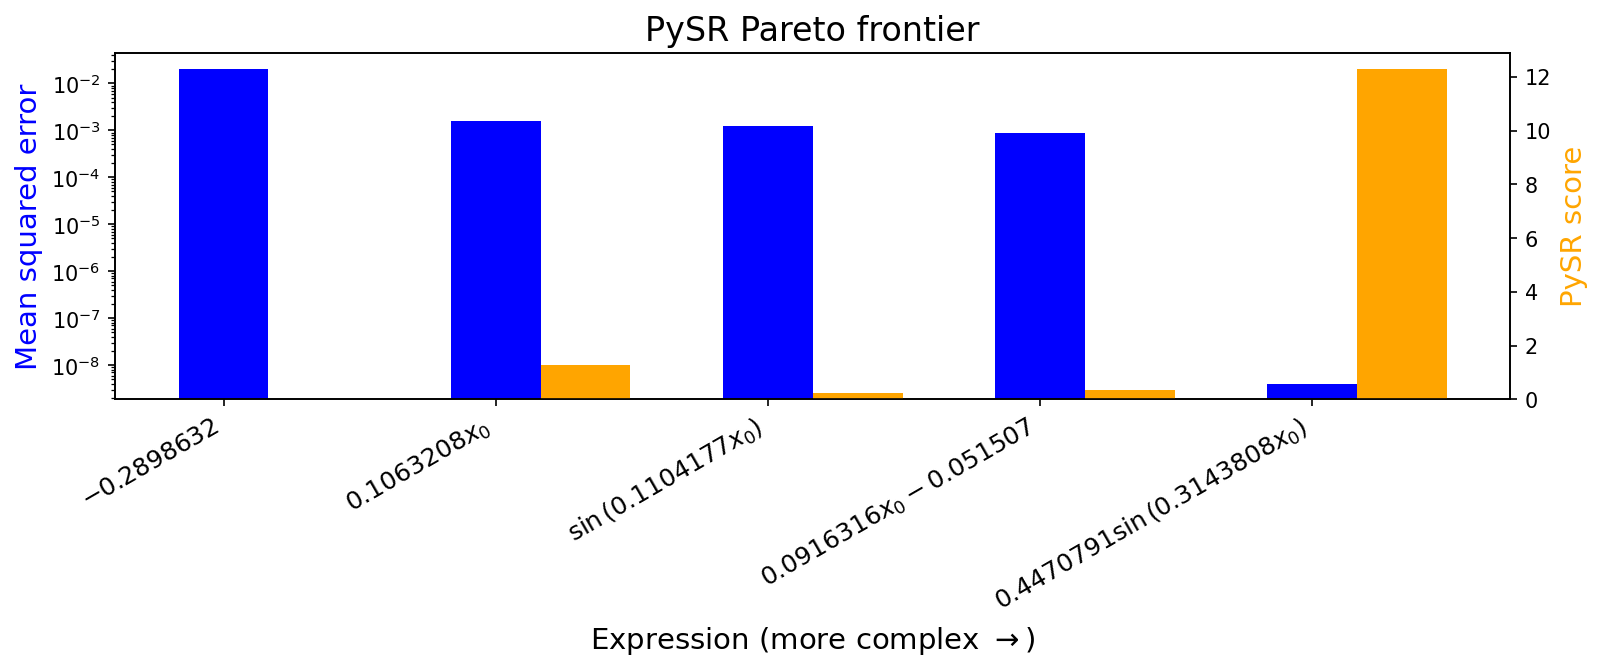

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3), dpi=150)
plt.bar(
    np.arange(len(equations.equations_)),
    equations.equations_.loss,
    width=0.33,
    color="blue",
)


plt.yscale("log")
plt.ylabel("Mean squared error", fontsize=14, color="blue")
plt.xticks(
    range(len(equations.equations_)),
    [f"${latex(round_expr(v,7))}$" for v in equations.equations_.sympy_format],
    rotation=30,
    ha="right",
    fontsize=12,
)
plt.title("PySR Pareto frontier", fontsize=16)
plt.xlabel("Expression (more complex $\\to$)", fontsize=14)

ax2 = plt.twinx()
ax2.bar(
    np.arange(len(equations.equations_)) + 0.33,
    equations.equations_.score,
    width=0.33,
    color="orange",
)
ax2.set_ylabel("PySR score", color="orange", fontsize=14)

plt.show()